<p>This notebook is part of the requriments to complete the IBM professional Data Science course. All code for this project will be available in this notebook.</p>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
from urllib.request import urlopen


from bs4 import BeautifulSoup
from urllib.request import urlopen

#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # 
from pandas.io.json import json_normalize 


# import k-means from clustering stage
from sklearn.cluster import KMeans
#!pip install folium

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Data Collection
The Dataset to be used for this project is not readily avalilable so I will be making use of the BeautifulSoup library to scrap the data from a webpage.

The list of Neighborhoods and their respective district (boroughs) on the [webpage](https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto) are placed in tables. Therefore I have to use the BeaufifulSoup library to scrape this data targeting the respective tables of interests. Also some districts(boroguhs) are further sub-divided into sub-districts however for the purpose of this projectI will be reperesenting neighborhoods that fall into this situation under the main district name.

In [2]:
# for Old_Toronto District which is further subdivided into four sub-districts.
index=[0,1,2,3]

neighborhood_names=[]
for i in index:
    print(i)
    borough = urlopen('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto#Neighbourhoods_by_district')
    bs= BeautifulSoup(borough, 'html5lib')
    neighborhood = bs.findAll('table')[i]
    neigh_names=[n_names for n_names in neighborhood.get_text().splitlines()]
    print(neigh_names)
    print('')
    neighborhood_names.append(neigh_names)

0
['', '', 'Alexandra Park', 'The Annex', 'Baldwin Village', 'Cabbagetown', 'CityPlace', 'Chinatown', 'Church and Wellesley', 'Corktown', 'Discovery District', 'Distillery District', 'Entertainment District', ' ', '', '', '', 'East Bayfront', 'Fashion District', 'Financial District', 'Garden District', 'Grange Park', 'Harbord Village', 'Harbourfront', 'Kensington Market', 'Little Japan (within the former First Chinatown)', 'Moss Park', 'Old Town', ' ', '', '', '', 'Quayside (future planned neighbourhood)', 'Queen Street West', 'Regent Park', 'South Core', 'St. James Town', 'St. Lawrence', 'Toronto Islands', 'Trefann Court', 'University (includes Huron–Sussex)', 'Yorkville', ' ', '', '', '', '  Old newspaper office in Cabbagetown', ' ', '']

1
['', '', 'The Beaches (also known as The Beach)', 'East Chinatown', 'East Danforth', 'Gerrard Street East (Gerrard India Bazaar or Little India)', 'Greektown (also known as the Danforth after the street it is on)', 'Leslieville', ' ', '', '', '', 

OLD_TORONTO

In [7]:
Old_Toronto=['Downtown_Core','East_End', 'North_End', 'West_End']
O_Toronto=pd.DataFrame()
for i in range(0,4):
  O_Toronto_Neigh=pd.DataFrame(neighborhood_names[i])
  O_Toronto_Neigh.replace('',np.NaN, inplace=True)
  O_Toronto_Neigh.replace(' ',np.NaN, inplace=True)
  O_Toronto=pd.concat([O_Toronto, O_Toronto_Neigh],ignore_index=True)



In [8]:
O_Toronto.dropna(inplace=True)

In [9]:
O_Toronto.reset_index(drop=True, inplace=True)

In [10]:
#removing extra last data due to the structure of the table.(Old newspaper office in Cabbagetown,Bay-and-gable houses in Little Italy,Shops along Queen Street East in the BeachesChaplin Estates in North Toronto)
#O_Toronto[O_Toronto.iloc[:,0]=='  Old newspaper office in Cabbagetown']
#32
#O_Toronto[O_Toronto.iloc[:,0]=='  Shops along Queen Street East in the Beaches']
#45
#O_Toronto[O_Toronto.iloc[:,0]=='  Bay-and-gable houses in Little Italy']
#97
#O_Toronto[O_Toronto.iloc[:,0]=='  Chaplin Estates in North Toronto']
#64

O_Toronto.drop([32, 45, 64, 97],inplace=True)

In [11]:
#function to rename the columns in a dataframe
'''def renamer(df1,df2,*args):
  df2=df1
  df2.insert(0,'Borughs','args')
  df2.rename(columns={0:'Neighborhoods'},inplace=True)
  return df2'''

"def renamer(df1,df2,*args):\n  df2=df1\n  df2.insert(0,'Borughs','args')\n  df2.rename(columns={0:'Neighborhoods'},inplace=True)\n  return df2"

In [12]:
#rename column and add new column
Old_Toronto=O_Toronto.copy()
Old_Toronto.insert(0,'Boroughs','Old_Toronto')
Old_Toronto.rename(columns={0:'Neigborhoods'},inplace=True)
Old_Toronto

,Boroughs,Neigborhoods
0,Old_Toronto,Alexandra Park
1,Old_Toronto,The Annex
2,Old_Toronto,Baldwin Village
3,Old_Toronto,Cabbagetown
4,Old_Toronto,CityPlace
...,...,...
92,Old_Toronto,Runnymede
93,Old_Toronto,Seaton Village
94,Old_Toronto,Swansea
95,Old_Toronto,Trinity–Bellwoods


To get neighborhoods in other districts (East York , Etobicoke, North_york, Scaborough and York)

In [13]:
#East York, Etobicoke,Scaborough,
table_num=[4,5,6,7,8]

east_york=[]
etobicoke=[]
north_york=[]
scaborough=[]
york=[]
for i in table_num:
  print(i)
  borough = urlopen('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto#Neighbourhoods_by_district')
  bs= BeautifulSoup(borough, 'html5lib')
  neighborhood = bs.findAll('table')[i]
  neigh_names=[n_names for n_names in neighborhood.get_text().splitlines()]
  print(neigh_names)
  print('')
  if i==4:
    east_york.append(neigh_names)
  elif i==5:
    etobicoke.append(neigh_names)
  elif i==6:
    north_york.append(neigh_names)
  elif i==7:
    scaborough.append(neigh_names)
  else:
    york.append(neigh_names) 


4
['', '', 'Old East York', '', 'Broadview North', 'Crescent Town', 'East Danforth', 'Pape Village', 'Woodbine Heights', ' ', '', '', '', 'Suburban East York', '', 'Bermondsey', "Governor's Bridge", 'Leaside', "O'Connor–Parkview", 'Thorncliffe Park', ' ', '', '', '', '  Bungalows in Old East York', ' ', '']

5
['', '', 'Alderwood', 'Centennial Park', 'Clairville', 'Eatonville (Etobicoke West Mall)', 'The Elms', 'Eringate', 'Humber Bay', 'Humber Heights-Westmount', 'Humber Valley Village', 'Humberwood', ' ', '', '', '', 'Islington-City Centre West', 'Kingsview Village (The Westway)', 'The Kingsway', 'Long Branch', 'Markland Wood', 'Mimico', 'New Toronto', 'Princess Gardens', 'Rexdale', ' ', '', '', '', 'Richview', 'Smithfield', 'Stonegate-Queensway', 'Sunnylea', 'Thistletown', 'Thorncrest Village', 'West Humber-Clairville', 'West Deane Park', 'Willowridge', ' ', '', '', '', '  Office towers at Islington–City Centre West', ' ', '']

6
['', '', 'Amesbury', 'Armour Heights', 'Bathurst Mano

In [14]:
#fucntion that removes empty data values.
def remover(df2,df,original):
  df2=pd.DataFrame()
  df=pd.DataFrame(original)
  df.replace('',np.NaN, inplace=True)
  df.replace(' ', np.NaN, inplace=True)
  df2=pd.concat([df2,df],ignore_index=True)
  if original ==east_york or scaborough:
    df2=df2.T
    df2.dropna(inplace=True)
    df2.reset_index(drop=True, inplace=True)
    
  else:
    df2.dropna(inplace=True)
    df2.reset_index(drop=True, inplace=True)
   

  return df2


EAST_YORK

In [15]:
east_york_data=remover('east_york_data', 'east_york2', east_york)

In [16]:
east_york_data

,0
0,Old East York
1,Broadview North
2,Crescent Town
3,East Danforth
4,Pape Village
5,Woodbine Heights
6,Suburban East York
7,Bermondsey
8,Governor's Bridge
9,Leaside


In [17]:
#removing extra data due to the html table from the webpage.
east_york_data.drop([0,6,12], inplace=True)
east_york_data

,0
1,Broadview North
2,Crescent Town
3,East Danforth
4,Pape Village
5,Woodbine Heights
7,Bermondsey
8,Governor's Bridge
9,Leaside
10,O'Connor–Parkview
11,Thorncliffe Park


In [18]:
east_york_df=east_york_data.copy()
east_york_df.insert(0,'Boroughs','East York')
east_york_df.rename(columns={0:'Neigborhoods'},inplace=True)
east_york_df

,Boroughs,Neigborhoods
1,East York,Broadview North
2,East York,Crescent Town
3,East York,East Danforth
4,East York,Pape Village
5,East York,Woodbine Heights
7,East York,Bermondsey
8,East York,Governor's Bridge
9,East York,Leaside
10,East York,O'Connor–Parkview
11,East York,Thorncliffe Park


##Etobicoke

In [19]:
etobicoke_data=remover('etobicoke_data', 'etobicoke2',etobicoke)

In [ ]:
etobicoke_data

In [ ]:
#to remove extra data by removing based on index
etobicoke_data.drop([28],inplace=True)
etobicoke_data

In [ ]:
etobicoke_df=etobicoke_data.copy()
etobicoke_df.insert(0,'Boroughs','Etobicoke')
etobicoke_df.rename(columns={0:'Neigborhoods'},inplace=True)
etobicoke_df

NORTH_YORK

In [23]:
north_york_data=remover('north_york_data','north_york2', north_york)

In [ ]:
north_york_data

In [25]:
#removing extra data.
north_york_data.drop([38], inplace=True)

In [ ]:
north_york_df=north_york_data.copy()
north_york_df.insert(0,'Boroughs','North York')
north_york_df.rename(columns={0:'Neigborhoods'},inplace=True)
north_york_df

# SCARBOROUGH

In [ ]:
scarborough_data=remover('scaborough_data','scaborough2',scaborough)
scarborough_data

In [ ]:
scarborough_data.drop([33], inplace=True)
scarborough_data

In [ ]:
scarborough_df=scarborough_data.copy()
scarborough_df.insert(0,'Boroughs','Scarborough')
scarborough_df.rename(columns={0:'Neigborhoods'},inplace=True)
scarborough_df

YORK

In [30]:
york_data=remover('york_data','york2',york)


In [31]:
#removing extra data
york_data.drop([12],inplace=True)


In [ ]:
york_df=york_data.copy()
york_df.insert(0,'Boroughs','York')
york_df.rename(columns={0:'Neigborhoods'},inplace=True)
york_df

In [33]:
big_data=pd.concat([Old_Toronto,east_york_df,etobicoke_df,north_york_df,scarborough_df,york_df],ignore_index=True)

In [ ]:
big_data

In [36]:
big_data.to_csv('./Toronto_Neighborhoods.csv',index=False)

In [25]:
import geopy
from  geopy.geocoders import Nominatim
nominatim_service = Nominatim(user_agent='Diwupirate') # Important line
geopy.geocoders.options.default_user_agent = 'Diwupirate' # Important line
geolocator = Nominatim()

In [39]:
city ="Alexandra Park"
country ="Toronto"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 43.650786999999994 
longtitude is:- -79.40431814731767


In [42]:
toronto_copy = big_data.copy()
geolocator.geocode('Toronto, Canada')
from geopy.extra.rate_limiter import RateLimiter
geocode=RateLimiter(geolocator.geocode, min_delay_seconds=1)
toronto_copy['Address']=toronto_copy['Neigborhoods'].astype(str) + ',' + ' Toronto'
toronto_copy['Location']= toronto_copy['Address'].apply(geocode)
toronto_copy['Point']=toronto_copy['Location'].apply(lambda loc:tuple(loc.point) if loc else None)
toronto_copy[['Latitude', 'Longitude', 'altitude']] = pd.DataFrame(toronto_copy['Point'].tolist(), index=toronto_copy.index)

In [ ]:
toronto_DF=toronto_copy

In [3]:
#importing the data form a csv file.
torontoDF=pd.read_csv('Toronto__Neighborhoods.csv')
torontoDF.head()


,Boroughs,Neigborhoods,Address,Location,Point,Latitude,Longitude,altitude
0,Old_Toronto,Alexandra Park,"Alexandra Park, Toronto","Alexandra Park, Spadina—Fort York, Old Toronto...","(43.650786999999994, -79.40431814731767, 0.0)",43.650787,-79.404318,0.0
1,Old_Toronto,The Annex,"The Annex, Toronto","The Annex, University—Rosedale, Old Toronto, T...","(43.6703377, -79.407117, 0.0)",43.670338,-79.407117,0.0
2,Old_Toronto,Baldwin Village,"Baldwin Village, Toronto","Baldwin Steps, South Hill, Toronto—St. Paul's,...","(43.6776885, -79.4081645, 0.0)",43.677689,-79.408164,0.0
3,Old_Toronto,Cabbagetown,"Cabbagetown, Toronto","Cabbagetown, Toronto Centre, Old Toronto, Toro...","(43.6644734, -79.3669861, 0.0)",43.664473,-79.366986,0.0
4,Old_Toronto,CityPlace,"CityPlace, Toronto","CityPlace, Spadina—Fort York, Old Toronto, Tor...","(43.6392482, -79.3963865, 0.0)",43.639248,-79.396387,0.0


In [4]:
#selecting the important columns to be used for the analysis.
#Borough, Neighborhood, latitude, longitude
torontoDF=torontoDF.reindex(columns=['Boroughs','Neigborhoods', 'Latitude', 'Longitude'])
torontoDF.head()

,Boroughs,Neigborhoods,Latitude,Longitude
0,Old_Toronto,Alexandra Park,43.650787,-79.404318
1,Old_Toronto,The Annex,43.670338,-79.407117
2,Old_Toronto,Baldwin Village,43.677689,-79.408164
3,Old_Toronto,Cabbagetown,43.664473,-79.366986
4,Old_Toronto,CityPlace,43.639248,-79.396387


Data Wrangling. The data cleaning in this dataset will not be extensive but only focused on the fetched Latitude and Longitude columns

In [5]:
len(torontoDF.Neigborhoods[torontoDF['Neigborhoods'].isnull()])

0

In [6]:
#to see if any latiude and longitude rurned contains a nan vaue
print(len(torontoDF.Latitude[torontoDF['Latitude'].isnull()]))
print(len(torontoDF.Longitude[torontoDF['Longitude'].isnull()]))

29
29


We have identified that 29 rows contains nan values for both latitude and longitude columns

In [7]:
#to find out hte specific rows that have nan values for their lat and longitude 
#we only need to check one column since it corresponds for both.

torontoDF.Longitude[torontoDF['Longitude'].isnull()]

11    NaN
19    NaN
22    NaN
30    NaN
32    NaN
35    NaN
36    NaN
43    NaN
48    NaN
49    NaN
56    NaN
61    NaN
74    NaN
83    NaN
87    NaN
115   NaN
145   NaN
150   NaN
162   NaN
166   NaN
169   NaN
172   NaN
188   NaN
203   NaN
204   NaN
205   NaN
206   NaN
209   NaN
211   NaN
Name: Longitude, dtype: float64

In [8]:
#function to replace the nan values in both columns with their lat and long values.
def lat(index,lat):
  torontoDF['Latitude'].iloc._setitem_with_indexer(index, round(lat,6))
def long(index,long_val):
  torontoDF['Longitude'].iloc._setitem_with_indexer(index, round(long_val,6)) 

In [9]:
torontoDF.iloc[211]

Boroughs                     York
Neigborhoods    Rockcliffe–Smythe
Latitude                      NaN
Longitude                     NaN
Name: 211, dtype: object

In [13]:
#making use of the result obtained from index returned with nan values
#11
lat(11,43.64499)
long(11,-79.36459)
19
lat(19,43.6529)
long(19,-79.398)

#22
lat(22,43.646861)
long(22,-79.36179)

#30
lat(30,43.661667)
long(30,-79.395)

#32
lat(32,43.667266)
long(32,-79.297128)

#35
lat(35,43.67153)
long(35,-79.32441)

#36
lat(36,43.678472)
long(36,-79.347222)

#43
lat(43,43.6462)
long(43,-79.3516)


#48

lat(48,43.688056)
long(48,-79.394028)

#49
lat(49,43.7)
long(49,-79.416667)

#56
lat(56,43.681)
long(56,-79.404)

#61
lat(61,43.706802)
long(61,-79.398271)

#74
lat(74,43.665556)
long(74,-79.464444)

#83
lat(83,43.6397)
long(83,-79.4072)

#87
lat(87,43.6762)
long(87,-79.4244)

#115
lat(115,43.694444)
long(115,-79.558611)

#145
lat(145,43.708)
long(145,-79.448)

#150
lat(150,43.746297)
long(150,-79.541186)

#162
lat(162,43.716667)
long(162,-79.527778)

#166
lat(166,43.656)
long(166,-79.475)

#169
lat(169,43.762)
long(169,-79.5)

#172
lat(172,43.76)
long(172,-79.24)

#188
lat(188,43.825833)
long(188,-79.300833)

#203
#lat(203,)
#long(203,)

#204
lat(204,43.695556)
long(204,-79.45)

#205
lat(205,43.691111)
long(205,-79.425833)


#206
lat(206,43.6575)
long(206,-79.4925)

#209
lat(209,43.6925)
long(209,-79.440833)

#211
lat(211,43.675278)
long(211,-79.488611)

In [16]:
#verifying if the latitude and longitude contain no null value. 
print(len(torontoDF.Latitude[torontoDF['Latitude'].isnull()]))
print(len(torontoDF.Longitude[torontoDF['Longitude'].isnull()]))

1
1


All the missing rows have been filled with their appropirate latitude and longitude data except for <b><a href="https://en.wikipedia.org/wiki/Fairbank,_Toronto">Briar Hill-Belgravia</a></b> which is  now linked with <b>Fairbank</b>. So therefore i will be dropping the rown that contains Briar Hill Belgravia with index 203

In [314]:
torontoDf=torontoDF.copy()

In [315]:
torontoDf.drop([203], inplace=True)

In [318]:
torontoDf.Neigborhoods.count()

214

In [271]:
#checking if any colun contains missing data.
for col in torontoDf.columns:
    print(col)
    print(torontoDf[col].notnull().count())
    print('')

Boroughs
214

Neighborhood
214

Latitude
214

Longitude
214



In [285]:
check=list(torontoDf.Neighborhood)

In [293]:
len(check)

211

In [19]:
# to veify nomissing rows are Present.
print(len(torontoDf.Latitude[torontoDf['Latitude'].isnull()]))
print(len(torontoDf.Longitude[torontoDf['Longitude'].isnull()]))

0
0


The dataset is now ready to be worked on.

In [301]:
print("from the data scraped on wikipedisa page Toronto has {} Boroughs and {} Neighborhoods".format(len(set(torontoDf.Boroughs)),len(torontoDf.Neighborhood)))

from the data scraped on wikipedisa page Toronto has 6 Boroughs and 214 Neighborhoods


#### Create a map of Toronto with neighborhoods superimposed on top.

In [26]:
address="Toronto, Ontario"
loc = geolocator.geocode(address)
latitude=loc.latitude
longitude=loc.longitude
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 43.6534817 
longtitude is:- -79.3839347


In [27]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 43.6534817, -79.3839347.


In [28]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(torontoDf['Latitude'], torontoDf['Longitude'], torontoDf['Boroughs'], torontoDf['Neigborhoods']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### One thing that is immediately noticeable from the map above is that the borough called Old_Toronto which is subdivided into four sub-boroughs is densely populated.

#### Next step involves using foursquare Api to get information abou the different neighborhoods and segmen them.

In [33]:
CLIENT_ID = 'UP1ZJR1DTR3MZU15IO0YPOJHS4W01HSEZ5YQ3HXM5IFDA40V'
CLIENT_SECRET = 'XVVDDIT2SOUUN1SDRIPI1N41GOWJ1WINKM0RGV1IRA12HUK4' # your Foursquare Secret
ACCESS_TOKEN = 'JNVUTXPMZZ3FRPDERCYVMBVBI300SJKTEHQQXFZNPUX4LZDA' 
VERSION = '20180604'
LIMIT = 100
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UP1ZJR1DTR3MZU15IO0YPOJHS4W01HSEZ5YQ3HXM5IFDA40V
CLIENT_SECRET:XVVDDIT2SOUUN1SDRIPI1N41GOWJ1WINKM0RGV1IRA12HUK4


#### Testing the foursquare API on one of the neighborhood to have an understanding of what the returned data will lokk like.

In [32]:
neighborhood_latitude = torontoDf.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = torontoDf.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = torontoDf.loc[0, 'Neigborhoods'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Alexandra Park are 43.650787, -79.40431814731767.


In [34]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=UP1ZJR1DTR3MZU15IO0YPOJHS4W01HSEZ5YQ3HXM5IFDA40V&client_secret=XVVDDIT2SOUUN1SDRIPI1N41GOWJ1WINKM0RGV1IRA12HUK4&v=20180604&ll=43.650787,-79.40431814731767&radius=500&limit=100'

In [35]:
results = requests.get(url).json()

In [39]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [36]:
results

{'meta': {'code': 200, 'requestId': '60fbea953c1a622547302b02'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Alexandra Park',
  'headerFullLocation': 'Alexandra Park, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 117,
  'suggestedBounds': {'ne': {'lat': 43.6552870045, 'lng': -79.39811050644924},
   'sw': {'lat': 43.6462869955, 'lng': -79.41052578818609}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f57af17e4b01cdf1e8bfa45',
       'name': 'Kanto',
       'location': {'address': '707 Dundas St W',
        'crossStreet': 'at Bathurst St',
        'lat': 43.6521668804813,
        'lng': -79.40484262234281,
        'labeledLatLngs': [{'label': 'dis

In [41]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

nearby_venues.head()


<ipython-input-41-4bb5108ce140>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-4f57af17e4b01cdf1e8bfa45-0,0,"[{'summary': 'This spot is popular', 'type': '...",4f57af17e4b01cdf1e8bfa45,Kanto,707 Dundas St W,at Bathurst St,43.652167,-79.404843,"[{'label': 'display', 'lat': 43.6521668804813,...",159,M5T 2W6,CA,Toronto,ON,Canada,"[707 Dundas St W (at Bathurst St), Toronto ON ...","[{'id': '4eb1bd1c3b7b55596b4a748f', 'name': 'F...",0,[],NaN,NaN
1,e-0-4fce6dfde4b0cf727b95f005-1,0,"[{'summary': 'This spot is popular', 'type': '...",4fce6dfde4b0cf727b95f005,Market 707,707 Dundas St W,NaN,43.652128,-79.404844,"[{'label': 'display', 'lat': 43.65212770675899...",155,NaN,CA,Toronto,ON,Canada,"[707 Dundas St W, Toronto ON, Canada]","[{'id': '4bf58dd8d48988d120951735', 'name': 'F...",0,[],NaN,NaN
2,e-0-5430b202498e9f625c1dcbb7-2,0,"[{'summary': 'This spot is popular', 'type': '...",5430b202498e9f625c1dcbb7,Bathurst Local,322 Bathurst St.,NaN,43.651528,-79.405836,"[{'label': 'display', 'lat': 43.65152789542257...",147,NaN,CA,Toronto,ON,Canada,"[322 Bathurst St., Toronto ON, Canada]","[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",0,[],97280505,NaN
3,e-0-51847d09498e26ede99fdb95-3,0,"[{'summary': 'This spot is popular', 'type': '...",51847d09498e26ede99fdb95,Montauk,765 Dundas St. W.,btwn Bathurst St. and Markham St.,43.652084,-79.406898,"[{'label': 'display', 'lat': 43.65208369287188...",252,M6J 1T9,CA,Toronto,ON,Canada,[765 Dundas St. W. (btwn Bathurst St. and Mark...,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",0,[],NaN,NaN
4,e-0-4f5e4f67e4b0241544b69415-4,0,"[{'summary': 'This spot is popular', 'type': '...",4f5e4f67e4b0241544b69415,#Hashtag Gallery,801 Dundas St W,Between Markham & Palmerston,43.651830,-79.408103,"[{'label': 'display', 'lat': 43.65183024518982...",326,M6J 1V2,CA,Toronto,ON,Canada,[801 Dundas St W (Between Markham & Palmerston...,"[{'id': '4bf58dd8d48988d1e2931735', 'name': 'A...",0,[],34784601,NaN


In [42]:
#filter the important columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Kanto,Filipino Restaurant,43.652167,-79.404843
1,Market 707,Food Court,43.652128,-79.404844
2,Bathurst Local,Bar,43.651528,-79.405836
3,Montauk,Bar,43.652084,-79.406898
4,#Hashtag Gallery,Art Gallery,43.651830,-79.408103


In [43]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Applying the foursquare Api on the whole Neighborhood.

In [49]:
def getNearbyVenues(names,boroughs latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, boroughs latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [60]:
def getNearbyVenuesB(names,boroughs, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, borough, lat, lng in zip(names, boroughs, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            borough,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Boroughs',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [61]:
#showing the borough name
toronto_venuesB = getNearbyVenuesB(names=torontoDf['Neigborhoods'],
                                 boroughs=torontoDf['Boroughs'],
                                   latitudes=torontoDf['Latitude'],
                                   longitudes=torontoDf['Longitude']
                                  )

Alexandra Park
The Annex
Baldwin Village
Cabbagetown
CityPlace
Chinatown
Church and Wellesley
Corktown
Discovery District
Distillery District
Entertainment District
East Bayfront
Fashion District
Financial District
Garden District
Grange Park
Harbord Village
Harbourfront
Kensington Market
Little Japan (within the former First Chinatown)
Moss Park
Old Town
Quayside (future planned neighbourhood)
Queen Street West
Regent Park
South Core
St. James Town
St. Lawrence
Toronto Islands
Trefann Court
University (includes Huron–Sussex)
Yorkville
The Beaches (also known as The Beach)
East Chinatown
East Danforth
Gerrard Street East (Gerrard India Bazaar or Little India)
Greektown (also known as the Danforth after the street it is on)
Leslieville
Main Square
Playter Estates
Port Lands
Riverdale
Upper Beaches
Villiers Island (future planned neighbourhood on an artificial island at the mouths of the Don River in the Port Lands)
Bedford Park
Casa Loma
Chaplin Estates
Davisville Village
Deer Park (Yon

In [283]:
check2=set(toronto_venuesB.Neighborhood)
check2

{' Birch Cliff Heights',
 'Agincourt',
 'Alderwood',
 'Alexandra Park',
 'Amesbury',
 'Armadale',
 'Armour Heights',
 'Baldwin Village',
 'Bathurst Manor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Beaconsfield Village',
 'Bedford Park',
 'Bendale (Cedarbrae)',
 'Bermondsey',
 'Birch Cliff',
 'Black Creek',
 'Bloor West Village',
 'Bracondale Hill',
 'Broadview North',
 'Brockton Village',
 "Brown's Corners (historical)",
 'Cabbagetown',
 'Carleton Village',
 'Casa Loma',
 'Centennial Park',
 'Chaplin Estates',
 'Chinatown',
 'Church and Wellesley',
 'CityPlace',
 'Clairlea',
 'Clairville',
 'Clanton Park (Wilson Heights)',
 'Cliffcrest',
 'Cliffside',
 'Corktown',
 'Corso Italia',
 'Crescent Town',
 'Davenport',
 'Davisville Village',
 'Deer Park (Yonge and St. Clair)',
 'Discovery District',
 'Distillery District',
 'Don Mills',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt Park',
 'Downsview',
 'Dufferin Grove',
 'Earlscourt',
 'East Bayfront',
 'East Chinatown',
 'East 

In [286]:
check=set(check)
check

{' Birch Cliff Heights',
 'Agincourt',
 'Alderwood',
 'Alexandra Park',
 'Amesbury',
 'Armadale',
 'Armour Heights',
 'Baldwin Village',
 'Bathurst Manor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Beaconsfield Village',
 'Bedford Park',
 'Bendale (Cedarbrae)',
 'Bermondsey',
 'Birch Cliff',
 'Black Creek',
 'Bloor West Village',
 'Bracondale Hill',
 'Broadview North',
 'Brockton Village',
 "Brown's Corners (historical)",
 'Cabbagetown',
 'Carleton Village',
 'Casa Loma',
 'Centennial Park',
 'Chaplin Estates',
 'Chinatown',
 'Church and Wellesley',
 'CityPlace',
 'Clairlea',
 'Clairville',
 'Clanton Park (Wilson Heights)',
 'Cliffcrest',
 'Cliffside',
 'Corktown',
 'Corso Italia',
 'Crescent Town',
 'Davenport',
 'Davisville Village',
 'Deer Park (Yonge and St. Clair)',
 'Discovery District',
 'Distillery District',
 'Don Mills',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt Park',
 'Downsview',
 'Dufferin Grove',
 'Earlscourt',
 'East Bayfront',
 'East Chinatown',
 'East 

In [288]:
check2.issubset(check)

True

In [291]:
check.difference(check2)

{'Port Union (Centennial Scarborough)', 'West Deane Park'}

In [63]:
print(toronto_venuesB.shape)
toronto_venuesB.head()

(5567, 8)


,Neighborhood,Boroughs,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alexandra Park,Old_Toronto,43.650787,-79.404318,Kanto,43.652167,-79.404843,Filipino Restaurant
1,Alexandra Park,Old_Toronto,43.650787,-79.404318,Market 707,43.652128,-79.404844,Food Court
2,Alexandra Park,Old_Toronto,43.650787,-79.404318,Bathurst Local,43.651528,-79.405836,Bar
3,Alexandra Park,Old_Toronto,43.650787,-79.404318,Montauk,43.652084,-79.406898,Bar
4,Alexandra Park,Old_Toronto,43.650787,-79.404318,#Hashtag Gallery,43.651830,-79.408103,Art Gallery


In [269]:
#checking if any colun contains missing data.
for col in toronto_venuesB.columns:
    print(col)
    print(toronto_venuesB[col].notnull().count())
    print('')

Neighborhood
5567

Boroughs
5567

Neighborhood Latitude
5567

Neighborhood Longitude
5567

Venue
5567

Venue Latitude
5567

Venue Longitude
5567

Venue Category
5567



In [277]:
print(len(set(toronto_venuesB.Neighborhood)))

209


In [106]:
toronto_venuesB.to_csv('venueb.csv',index=False)

#### Grouping by Neighborhood to see how man venue was returned for each.


In [77]:
venue_count=toronto_venuesB.groupby('Neighborhood').count()
venue_count.head(10)


,Boroughs,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Birch Cliff Heights,5,5,5,5,5,5,5
Agincourt,11,11,11,11,11,11,11
Alderwood,8,8,8,8,8,8,8
Alexandra Park,100,100,100,100,100,100,100
Amesbury,6,6,6,6,6,6,6
Armadale,15,15,15,15,15,15,15
Armour Heights,4,4,4,4,4,4,4
Baldwin Village,29,29,29,29,29,29,29
Bathurst Manor,4,4,4,4,4,4,4


In [79]:
#to get the neighborhood with the highest  and lowest number of returned values
print(venue_count['Venue'].idxmax())#highest
print(venue_count.Venue.idxmin())#lowest


Queen Street West
Bayview Woods-Steeles


In [73]:
toronto_venuesB.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False, kind='mergesort')

,Boroughs,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Queen Street West,144,144,144,144,144,144,144
East Danforth,138,138,138,138,138,138,138
Alexandra Park,100,100,100,100,100,100,100
Entertainment District,100,100,100,100,100,100,100
Financial District,100,100,100,100,100,100,100
Grange Park,100,100,100,100,100,100,100
Harbourfront,100,100,100,100,100,100,100
Princess Gardens,100,100,100,100,100,100,100
Uptown,100,100,100,100,100,100,100


In [88]:
# to identify the boroughs   with the highest and lowest venue returned respectively.
print('Borough with the highest number of venues returned is',toronto_venuesB['Boroughs'][toronto_venuesB['Neighborhood']=="Queen Street West"].head(1))
print('Borough with the highest number of venues returned is', toronto_venuesB['Boroughs'][toronto_venuesB['Neighborhood']=="Bayview Woods-Steeles"].head(1))

Borough with the highest number of venues returned is 1394    Old_Toronto
Name: Boroughs, dtype: object
Borough with the highest number of venues returned is 4490    North York
Name: Boroughs, dtype: object


### To get how many  unique categories are in the dataset.

In [90]:
print('There are {} uniques categories.'.format(len(toronto_venuesB['Venue Category'].unique())))

There are 352 uniques categories.


#### Analyzing the Neighborhoods

In [110]:
# one hot encoding

toronto_onehot=pd.get_dummies(toronto_venuesB, columns=['Venue Category'], prefix="", prefix_sep="")


# move neighborhood column to the first column
#fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
#toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Boroughs,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hong Kong Restaurant,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Loc

### Drop the columns that are not needed

In [138]:
#after column drop we are left 
print(toronto_onehot.shape)
toronto_onehot.reset_index()
toronto_onehot.head()

(5567, 353)


,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hong Kong Restaurant,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad

In [182]:
#rdropping duplicate column (Neighborhood) 
toronto_onehot=toronto_onehot.loc[:,~toronto_onehot.columns.duplicated()]

In [185]:
toronto_onehot.shape[1]

352

In [196]:
#converting  the coluumns to float
Toronto_onehot=toronto_onehot.iloc[:,1:].astype(float)

In [197]:
Toronto_onehot['Neighborhood']=toronto_onehot['Neighborhood']
Toronto_onehot.head()

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hong Kong Restaurant,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,

In [199]:
#move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot= Toronto_onehot[fixed_columns]
Toronto_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hong Kong Restaurant,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon 

### Next Group the dataset by Neighboorhod and by taking the mean of the frequency of occurence of the categories.

In [202]:
toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head(20)

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hong Kong Restaurant,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon 

In [204]:
toronto_grouped.shape

(209, 352)

In [259]:
#checking if any colun contains missing data.
for col in toronto_grouped.columns:
    print(col)
    print(toronto_grouped[col].notnull().count())
    print('')

Neighborhood
209

ATM
209

Accessories Store
209

Adult Boutique
209

Afghan Restaurant
209

African Restaurant
209

Airport Terminal
209

American Restaurant
209

Animal Shelter
209

Antique Shop
209

Arcade
209

Arepa Restaurant
209

Argentinian Restaurant
209

Art Gallery
209

Art Museum
209

Arts & Crafts Store
209

Arts & Entertainment
209

Asian Restaurant
209

Athletics & Sports
209

Auto Dealership
209

Auto Garage
209

Automotive Shop
209

BBQ Joint
209

Baby Store
209

Bagel Shop
209

Bakery
209

Bank
209

Bar
209

Baseball Field
209

Basketball Court
209

Basketball Stadium
209

Beach
209

Beach Bar
209

Bed & Breakfast
209

Beer Bar
209

Beer Store
209

Belgian Restaurant
209

Big Box Store
209

Bike Shop
209

Bike Trail
209

Bistro
209

Board Shop
209

Boat or Ferry
209

Bookstore
209

Boutique
209

Bowling Alley
209

Brazilian Restaurant
209

Breakfast Spot
209

Brewery
209

Bridal Shop
209

Bubble Tea Shop
209

Burger Joint
209

Burrito Place
209

Bus Line
209

Bus Stati

### Getting the top five menu for each neighborhood.

In [205]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Birch Cliff Heights----
            venue  freq
0            Park   0.4
1        Gym Pool   0.2
2  Baseball Field   0.2
3             Gym   0.2
4     Opera House   0.0


----Agincourt----
                   venue  freq
0     Chinese Restaurant  0.18
1            Coffee Shop  0.09
2  Vietnamese Restaurant  0.09
3          Train Station  0.09
4       Asian Restaurant  0.09


----Alderwood----
            venue  freq
0     Pizza Place  0.25
1             Pub  0.12
2  Sandwich Place  0.12
3             Gym  0.12
4            Pool  0.12


----Alexandra Park----
                    venue  freq
0                     Bar  0.12
1    Caribbean Restaurant  0.05
2                    Café  0.05
3  Furniture / Home Store  0.05
4      Italian Restaurant  0.03


----Amesbury----
                venue  freq
0        Intersection  0.17
1         Gas Station  0.17
2                Park  0.17
3         Coffee Shop  0.17
4  Athletics & Sports  0.17


----Armadale----
              venue  freq
0       

### Creatng a pandas DataFrame

In [206]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [247]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Birch Cliff Heights,Park,Gym Pool,Baseball Field,Gym,Opera House,Paper / Office Supplies Store,Pakistani Restaurant,Outdoor Supply Store,Other Great Outdoors,Organic Grocery
1,Agincourt,Chinese Restaurant,Coffee Shop,Vietnamese Restaurant,Train Station,Asian Restaurant,Cantonese Restaurant,Hong Kong Restaurant,Food Court,Korean Restaurant,Peking Duck Restaurant
2,Alderwood,Pizza Place,Pub,Sandwich Place,Gym,Pool,Pharmacy,Coffee Shop,Paper / Office Supplies Store,Pakistani Restaurant,Outdoor Supply Store
3,Alexandra Park,Bar,Caribbean Restaurant,Café,Furniture / Home Store,Italian Restaurant,Art Gallery,Bakery,Park,Asian Restaurant,Liquor Store
4,Amesbury,Intersection,Gas Station,Park,Coffee Shop,Athletics & Sports,Bank,ATM,Organic Grocery,Peking Duck Restaurant,Pastry Shop


In [255]:
neighborhoods_venues_sorted['1st Most Common Venue'].notnull().count()

209

In [258]:
#checking if any colun contains missing data.
for col in neighborhoods_venues_sorted.columns:
    print(col)
    print(neighborhoods_venues_sorted[col].notnull().count())
    print('')

Neighborhood
209

1st Most Common Venue
209

2nd Most Common Venue
209

3rd Most Common Venue
209

4th Most Common Venue
209

5th Most Common Venue
209

6th Most Common Venue
209

7th Most Common Venue
209

8th Most Common Venue
209

9th Most Common Venue
209

10th Most Common Venue
209



### Shappe of Neighborhood venues sorted.

In [248]:
neighborhoods_venues_sorted.shape

(209, 11)

## Clustering The Neighborhoods using Kmeans

<p>Kmeans is a clustering alogorithm that is well suited for unsupervised learning albeit with some limitations. Kmeans operates by grouping items into clusters such that there is a high intracluster similarity and low intertcluster similarity, where an item can only belong to one cluster.</p>

</p>Kmeans as an algorithm falls under what is called Expectation Maximisation algorithms and this is due to the way clusters are formed in which an initail center point is selected randomly for each cluster and then data points are assigned to that point, the second step, known as maximization is to improve the estimation of the cluster using knowledge from the first step. The two steps are processed repeatedly until convergence is reached. At each maximization a new center point is used which happens to be the mean of the previous data points.</p>

<p> The Sum of Squared Error (SSE) gives us info on how well a certain dataset is clustered with a lower SSE value pointing to a high intracluster similarity and a higher SSE value pointing to low intracluster similarity.With an increase in clusters, the SSE tends to decrease toward 0. The SSE is zero if it is equal to the total number of data points in the dataset, as at this stage each data point becomes its own cluster, and no error exists between the cluster and its center. So the goal with the elbow method is to choose a small value of k that has a low SSE, and the elbow
usually represents this value.</p>

#### Selecting the optimal clusters for the dataset

In [260]:
#tgc=toronto Grouped cluster.
tgc=toronto_grouped.drop('Neighborhood', 1)



In [261]:
#import important libraries
from scipy.spatial.distance import cdist, pdist
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(tgc) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(tgc, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/tgc.shape[0] for d in dist]
# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(tgc)**2)/tgc.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

C:\Users\Homet\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


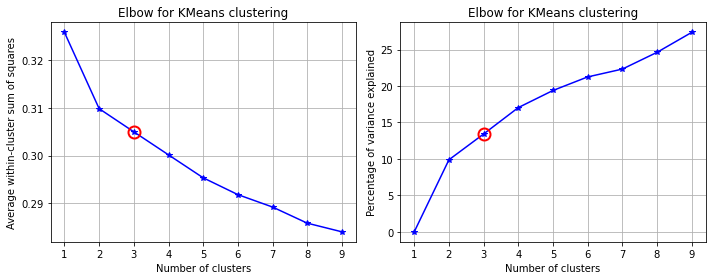

In [262]:
kIdx = 10-1
##### plot ###
kIdx = 2
# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()


In [263]:
kclusters = 3



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,init='k-means++', n_init=12, random_state=0).fit(tgc)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40] 

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [319]:
#torontoData=torontoDf.copy()

In [321]:
#torontoData.Neigborhoods[torontoData.Neigborhoods=='West Deane Park']

130    West Deane Park
Name: Neigborhoods, dtype: object

In [322]:
#torontoData.drop([192,130],inplace=True)

In [323]:
#torontoData.iloc[192]

Boroughs                    Scarborough
Neigborhoods    Scarborough City Centre
Latitude                      43.772974
Longitude                    -79.257648
Name: 194, dtype: object

In [325]:

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = torontoData
toronto_merged.rename(columns={'Neigborhoods':'Neighborhood'},inplace=True)

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head() # check the last columns!

,Boroughs,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Old_Toronto,Alexandra Park,43.650787,-79.404318,0,Bar,Caribbean Restaurant,Café,Furniture / Home Store,Italian Restaurant,Art Gallery,Bakery,Park,Asian Restaurant,Liquor Store
1,Old_Toronto,The Annex,43.670338,-79.407117,0,Pizza Place,Grocery Store,Thai Restaurant,Bistro,Wings Joint,Diner,Gym,Middle Eastern Restaurant,Bookstore,Coffee Shop
2,Old_Toronto,Baldwin Village,43.677689,-79.408164,0,Coffee Shop,Café,Sandwich Place,History Museum,Burger Joint,Garden Center,Museum,Steakhouse,Modern European Restaurant,Middle Eastern Restaurant
3,Old_Toronto,Cabbagetown,43.664473,-79.366986,0,Café,Restaurant,Coffee Shop,Indian Restaurant,Gastropub,Diner,Beer Store,Pizza Place,Bakery,Pub
4,Old_Toronto,CityPlace,43.639248,-79.396387,0,Coffee Shop,Grocery Store,Gym,Café,Park,Japanese Restaurant,Caribbean Restaurant,Sushi Restaurant,Greek Restaurant,Falafel Restaurant


In [326]:
toronto_merged.shape

(212, 15)

#### Placing the cluster label column in the last position.

In [332]:
x=pd.DataFrame()
x=toronto_merged['Cluster Labels']
toronto_Merged=toronto_merged.copy()
toronto_Merged.drop(['Cluster Labels'],axis=1,inplace=True)
toronto_Merged['Cluster Labels']=x
toronto_Merged.head()

,Boroughs,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Old_Toronto,Alexandra Park,43.650787,-79.404318,Bar,Caribbean Restaurant,Café,Furniture / Home Store,Italian Restaurant,Art Gallery,Bakery,Park,Asian Restaurant,Liquor Store,0
1,Old_Toronto,The Annex,43.670338,-79.407117,Pizza Place,Grocery Store,Thai Restaurant,Bistro,Wings Joint,Diner,Gym,Middle Eastern Restaurant,Bookstore,Coffee Shop,0
2,Old_Toronto,Baldwin Village,43.677689,-79.408164,Coffee Shop,Café,Sandwich Place,History Museum,Burger Joint,Garden Center,Museum,Steakhouse,Modern European Restaurant,Middle Eastern Restaurant,0
3,Old_Toronto,Cabbagetown,43.664473,-79.366986,Café,Restaurant,Coffee Shop,Indian Restaurant,Gastropub,Diner,Beer Store,Pizza Place,Bakery,Pub,0
4,Old_Toronto,CityPlace,43.639248,-79.396387,Coffee Shop,Grocery Store,Gym,Café,Park,Japanese Restaurant,Caribbean Restaurant,Sushi Restaurant,Greek Restaurant,Falafel Restaurant,0


In [354]:
rainbow

['#8000ff', '#80ffb4', '#ff0000']

In [359]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters
#### Examining each cluster and determinng the discriminating venue categories that distinguish each cluster. Based on the defining categories, i Will assign a name to each cluster.

## Cluster 0
#### Food Cluster.
<p>The most popular venue categories in this cluster relates to Food. i.e Restruants  </p>

In [365]:
toronto_Merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandra Park,Bar,Caribbean Restaurant,Café,Furniture / Home Store,Italian Restaurant,Art Gallery,Bakery,Park,Asian Restaurant,Liquor Store
1,The Annex,Pizza Place,Grocery Store,Thai Restaurant,Bistro,Wings Joint,Diner,Gym,Middle Eastern Restaurant,Bookstore,Coffee Shop
2,Baldwin Village,Coffee Shop,Café,Sandwich Place,History Museum,Burger Joint,Garden Center,Museum,Steakhouse,Modern European Restaurant,Middle Eastern Restaurant
3,Cabbagetown,Café,Restaurant,Coffee Shop,Indian Restaurant,Gastropub,Diner,Beer Store,Pizza Place,Bakery,Pub
4,CityPlace,Coffee Shop,Grocery Store,Gym,Café,Park,Japanese Restaurant,Caribbean Restaurant,Sushi Restaurant,Greek Restaurant,Falafel Restaurant


## Cluster 1
#### Entertainment Cluster.
<p> The most categories in this spott are outdoor activites relationg to fun ranging from sporting centers,music venue, food spots and Art Galleries <p/>

In [364]:
toronto_Merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Toronto Islands,Harbor / Marina,Café,Park,Music Venue,Pastry Shop,Paper / Office Supplies Store,Pakistani Restaurant,Outdoor Supply Store,Other Great Outdoors,Organic Grocery
42,Upper Beaches,Park,Café,Hungarian Restaurant,Asian Restaurant,Flower Shop,ATM,Paper / Office Supplies Store,Pakistani Restaurant,Outdoor Supply Store,Other Great Outdoors
53,Moore Park,Gym,Park,Trail,Office,Paper / Office Supplies Store,Pakistani Restaurant,Outdoor Supply Store,Other Great Outdoors,Organic Grocery,Optical Shop
55,Rosedale,Park,Health & Beauty Service,Japanese Restaurant,Bike Trail,Playground,ATM,Opera House,Paper / Office Supplies Store,Pakistani Restaurant,Outdoor Supply Store
56,South Hill (includes Rathnelly),Park,French Restaurant,Modern European Restaurant,Garden Center,Skating Rink,Historic Site,History Museum,Optical Shop,Paper / Office Supplies Store,Pakistani Restaurant


## Cluster 2
##  Optical Cluster

<p> not much data to work with in this cluster. So i just name it the most commont venue in all three neighborhoods. </p>

In [367]:
toronto_Merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
136,Bayview Woods-Steeles,Dog Run,ATM,Peking Duck Restaurant,Park,Paper / Office Supplies Store,Pakistani Restaurant,Outdoor Supply Store,Other Great Outdoors,Organic Grocery,Optical Shop
200,West Rouge,Trail,ATM,Peking Duck Restaurant,Park,Paper / Office Supplies Store,Pakistani Restaurant,Outdoor Supply Store,Other Great Outdoors,Organic Grocery,Optical Shop
205,Humewood–Cedarvale (includes Upper Village (al...,Dog Run,Field,Trail,Convenience Store,Hockey Arena,Optical Shop,Park,Paper / Office Supplies Store,Pakistani Restaurant,Outdoor Supply Store
